

## **Question 1: What is Simple Linear Regression?**

**Answer:**
Simple Linear Regression is a statistical method used to model the relationship between two variables:

* **One independent variable (X)**
* **One dependent variable (Y)**

The goal is to fit a straight line through the data such that the predicted values are as close as possible to the actual values.
The line is represented as:

Y=β0​+β1​X

Where:

β
0
	= intercept


β
1 = slope

It helps to understand how changes in X affect Y and is widely used for prediction and trend analysis.

---



## **Question 2: What are the key assumptions of Simple Linear Regression?**

**Answer:**
The key assumptions are:

1. **Linearity**
   The relationship between X and Y must be linear.

2. **Independence of Errors**
   Residuals must not be correlated with each other.

3. **Homoscedasticity**
   Constant variance of errors across all levels of X.

4. **Normality of Errors**
   Residuals should follow a normal distribution.

5. **No Outliers**
   Outliers can distort the regression line significantly.

---





## **Question 3: What is heteroscedasticity, and why is it important?**

**Answer:**
**Heteroscedasticity** occurs when the variance of residuals is not constant across all values of the independent variable.

Why it is important:

* It violates a core assumption of regression.
* It leads to **biased standard errors**.
* This causes **incorrect p-values**, making hypothesis tests unreliable.
* Predictions become unstable for large values of X.

Addressing heteroscedasticity improves model reliability and accuracy.

---



## **Question 4: What is Multiple Linear Regression?**

**Answer:**
Multiple Linear Regression (MLR) models the relationship between **one dependent variable (Y)** and **multiple independent variables (X₁, X₂, X₃, …)**.

General formula:

[
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n
]

It helps capture more complex relationships compared to Simple Linear Regression.

---



## **Question 5: What is polynomial regression, and how does it differ?**

**Answer:**
Polynomial Regression is an extension of linear regression where we include polynomial powers of the input variable.

Example (degree 2):

[
Y = \beta_0 + \beta_1 X + \beta_2 X^2
]

**Difference:**

* Linear regression fits a straight line.
* Polynomial regression fits a **curved** relationship.
* Still considered linear in parameters because coefficients are linear.

---



# **Question 6: Python Program for Simple Linear Regression**

Using data:
X = [1,2,3,4,5]
Y = [2.1,4.3,6.1,7.9,10.2]





---


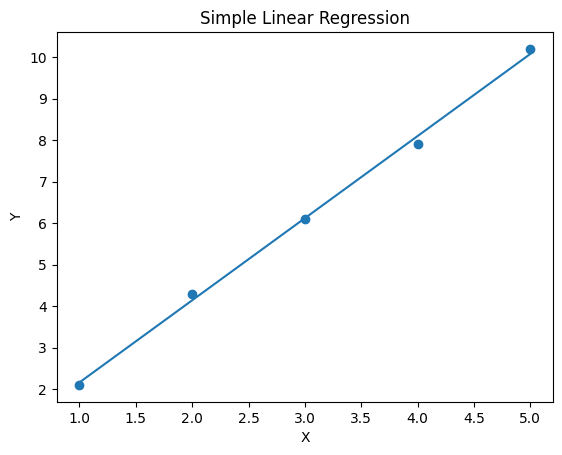

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.1,4.3,6.1,7.9,10.2])

model = LinearRegression()
model.fit(X, Y)

pred = model.predict(X)

plt.scatter(X, Y)
plt.plot(X, pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()


# **Question 7: Multiple Linear Regression + VIF**

Data:
Area = [1200,1500,1800,2000]
Rooms = [2,3,3,4]
Price = [250000,300000,320000,370000]



**Interpretation:**
VIF > 5 or 10 → **Strong multicollinearity present**.

---



In [ ]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.DataFrame({
    "Area": [1200,1500,1800,2000],
    "Rooms": [2,3,3,4],
    "Price": [250000,300000,320000,370000]
})

X = data[["Area","Rooms"]]
Y = data["Price"]

X_const = sm.add_constant(X)
model = sm.OLS(Y, X_const).fit()

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
print(model.summary())


  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Wed, 26 Nov 2025   Prob (F-statistic):             0.0377
Time:                        06:43:02   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# **Question 8: Polynomial Regression (Degree = 2)**

Data:
X = [1,2,3,4,5]
Y = [2.2,4.8,7.5,11.2,14.7]




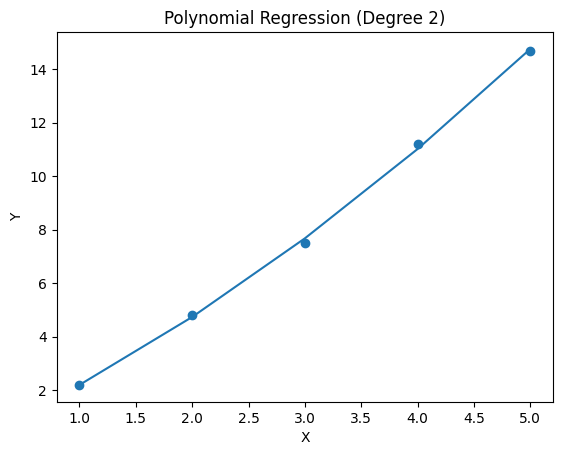

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2,4.8,7.5,11.2,14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

pred = model.predict(X_poly)

plt.scatter(X, Y)
plt.plot(X, pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.show()

# **Question 9: Residual Plot + Heteroscedasticity Check**

Data:
X = [10,20,30,40,50]
Y = [15,35,40,50,65]


```

**Assessment:**

* If residuals spread increases → heteroscedasticity present.
* If spread is uniform → homoscedasticity.

---



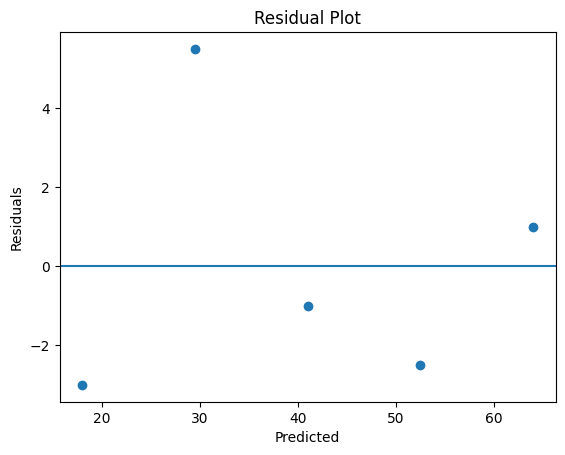

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10,20,30,40,50]).reshape(-1,1)
Y = np.array([15,35,40,50,65])

model = LinearRegression()
model.fit(X, Y)

pred = model.predict(X)
residuals = Y - pred

plt.scatter(pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# **Question 10: Handling Heteroscedasticity & Multicollinearity**

**Answer:**
As a data scientist predicting house prices:

---

### **To fix heteroscedasticity:**

1. **Use log transformation of Y**
   [
   Y' = \log(Y)
   ]

2. **Use Weighted Least Squares (WLS)**
   Gives lower weight to points with high variance.

3. **Use robust standard errors**
   (e.g., HC3 estimators)

4. **Remove outliers**
   They may cause variance inflation.

---

### **To fix multicollinearity:**

1. **Remove correlated variables**
   If Area and Rooms are highly correlated, keep only Area.

2. **Use PCA (Principal Component Analysis)**
   Converts correlated features into independent components.

3. **Use Regularization**

   * Ridge Regression
   * Lasso Regression

4. **Calculate VIF** and drop variables with VIF > 10.

---

### **Outcome:**

By applying these steps, the regression model becomes:

* More stable
* Statistically valid
* More accurate in prediction
* Generalizes better to new data

---